# ★ 투자지표를 활용한 매매 시점 모니터링 ★

[블로그 바로가기][URL]

[URL]: https://kirion.tistory.com/entry/1-%ED%88%AC%EC%9E%90%EC%A7%80%ED%91%9C%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-%EB%A7%A4%EB%A7%A4-%EC%8B%9C%EC%A0%90-%EB%AA%A8%EB%8B%88%ED%84%B0%EB%A7%81-%EA%B0%9C%EC%9A%94

# 1. 투자지표를 활용한 매매 시점 모니터링 - 개요

<p style="font-size:16px"><b>RMI, RSI를 활용한 매매 시점 모니터링</b></p>
   
이전 포스팅에서는 변동성 돌파 전략을 이용해 종목을 모니터링 하고 카카오톡 API를 통해 나에게 메세지를 보내는 프로그램을 개발하였었다.   
   
2022.10.19 - [개발일지/주식 단타 전략] - 0. 주식 단타 전략 모니터링 시스템 - 개요   
   
문제는 우리가 모든 자금을 단기 매매에만 투자하는 것은 위험 부담이 클 뿐아니라, 전업 투자자가 아닌 이상 지속적으로 매매를 실행하기에도 어렵다.   
따라서 일정 금액만 단기 매매에 사용하고, 남은 자금은 중, 장기로 가져갈 투자 종목을 고르고 투자하는 것이 바람직하다 생각한다.   
이에 보조지표인 RSI, RMI를 먼저 활용해서 중, 장기용 모니터링 프로그램을 개발해 보고자 한다.   
   
이번 주제의 포스팅 목록은 다음과 같다.   
   
1. RSI, RMI 개념 소개, 프로그램 설계 개획
2. 파이썬 기반으로 주요 기능 개발 및 백테스팅
3. 매수 종목 탐색을 위한 프로그램 개발 및 알림
4. 보유 종목의 매도 시점에 대한 프로그램 개발 및 알림
   
각 번호에 대해 간략히 얘기하자면, 우선 1번인 이번 글에서는 RSI와 RMI 투자지표가 무엇인지, 어떻게 활용할 수 있는지 개념적인 이야기를 할 것이다. 그리고 이 투자지표를 활용해 어떤 프로그램을 개발할 것인지에 대한 설계를 간단히 설명할 것이다.   
2번은 투자지표를 모니터링할 수 있도록 파이썬으로 구현한 후, 해당 지표가 실제로 활용가치가 있는지 과거 주가를 이용해 백테스팅을 해 검증한다.   
3번으로 이제 현재 시점으로 매수 시그널이 뜨는 종목을 탐색한다. 일봉을 기준으로 탐색할 것이기 때문에, 상장된 모든 종목에 대한 탐색이 가능하다.   
4번으로 매수한 종목에 대한 매도 시점을 모니터링 할 수 있는 프로그램을 구현한다. 매수를 좋은 타이밍에 잘 했어도 잘 팔지 못하면 투자는 실패하기 때문이다.   
   
이렇게 번호대로 각각의 주제를 잡아서 글을 포스팅 하겠다.   
   
먼저, 첫 번째 주제로 RSI, RMI 개념을 소개하겠다.   
   
<p style="font-size:16px"><b>RSI, RMI</b></p>
   
한 가지 양해를 구하고 넘어갈 점이 있다. 본 포스팅의 목적은 해당 지표를 활용해 모니터링 할 수 있는 프로그램의 개발이기 때문에 관련된 투자 지표는 간략하게 설명을 할 예정이다. 지표에 관한 보다 상세한 정보와 정확한 정보는 다른 전문가가 설명한 글을 참고바란다.   
   
우선 RSI에 대해 알아보자.   
RSI란 과매수, 과매도를 나타내는 지표이다. RMI는 RSI의 변형으로 N일 전 가격을 참조한다는 점만 다르다.   
해당 종목이 과매수 상태인가, 과매도 상태인가에 대해 0~100 사이로 나타내며, 값이 70 이상이면 과매수, 30 이하이면 과매도 상태를 나타낸다.   
과매수 상태라는 것은 매수세가 강하하는 말이고, 과매도 상태는 매도세가 강하다는 뜻이기에 투자에 있어 흐름을 참고할 수 있다.   
즉, 30 이하일 때 매수, 70 이상일 때 매도하면 된다는 말이다. 하지만, 해당 지표를 맹신해서는 안 되는 것이 하락세에 있는 종목은 RSI값이 계속 30이하에서 소폭으로 오르락 내리락만 하며 주가가 하락하기 때문에 매도 시그널 없이 매수 시그널만 계속 나타날 가능성이 높다. 따라서 회사에 대한 분석이 선행되는 것이 필수이다.   
   
그렇기에 RSI 지표를 활용해 어떤 회사를 고를 것인가에 대한 부분에서 도움을 받고자 한다. 앞으로 여러가지 투자 지표를 살펴볼 것인데, 먼저 RSI, RMI 지표를 이용해 매수 시그널이 있는 종목 탐색하고, 매수를 결정하는 것은 다른 투지 지표 및 회사에 대한 분석 후 투자자 본인의 경험과 판단으로 하고자 한다.   
   
그럼 RSI와 RMI의 계산 공식을 보자.   
   
1. U = 전날 주가보다 오늘 주가가 상승할 때의 주가 상승폭(up)
2. D = 전날 주가보다 오늘 주가가 하락할 때의 주가 하락폭(down)
3. AU = 일정기간(N일) 동안의 U의 평균값
4. AD = 일정기간(N일) 동안의 D의 평균값
5. RS = AU / AD
6. RSI = AU / (AU + AD) = RS / (1 + RS)
7. RSI 시그널 =  RSI의 이동평균선
   
여기서 N은 투자자가 설정할 수 있지만, 통상적으로 14일로 사용할 것을 권장한다.   
   
RMI의 계산 공식은 RSI의 계산 공식에서 U와 D를 N일전 주가로 수정하면 된다.   
   
1. U = N일전 주가보다 오늘 주가가 상승할 때의 주가 상승폭(up)
2. D = N일전 주가보다 오늘 주가가 하락할 때의 주가 하락폭(down)
3. AU = 일정기간(N일) 동안의 U의 평균값
4. AD = 일정기간(N일) 동안의 D의 평균값
5. RM = AU / AD
6. RMI = AU / (AU + AD) = RM / (1 + RS)
7. RMI 시그널 =  RSI의 이동평균선
   
즉, RSI보다 조금 더 장기적인 매매 추세를 볼 수 있다.   
   
위의 식과 각 지표의 특성을 이용해 모니터링하는 프로그램을 개발하고자 한다.   
   
<p style="font-size:16px"><b>종목 탐색 프로그램 설계</b></p>
   
프로그램을 개발에 필요한 구성은 다음과 같다.   
   
- Python
- 주가 데이터
- 카카오톡 API
- RSI, RMI 구현
   
RSI와 RMI의 계산식을 구현한 후 주가데이터를 받아 과거 주가 데이터에 백테스트를 할 예정이다.   
백테스트를 통해 어느 시점에 매매를 해야 안정성 및 수익률이 좋은지 확인하고 이에 따라 전략을 세운다.   
전략에 따라 주식 시장을 시작할 때 혹은 마감 된 후 탐색한 종목리스트를 추천한다.   
보유한 종목에 대해 매 장이 마감된 후 다음날 대비를 하기 위해 매매 시그널을 분석해 리포트한다.   
   
종목 리스트 추천과 리포트 형식에 대해선 개발을 하면서 양식을 잡아야 할 것 같다.   
우선적으로 카카오톡 API를 이용해 간단한 알림 메세지부터 진행하려 한다.

# 2. 투자지표를 활용한 매매 시점 모니터링 - RSI, RMI

<p style="font-size:16px"><b>투자지표(RSI, RMI) 파이썬 구현 및 자동매매 알고리즘 구현</b></p>
   
우선 파이썬으로 주가 데이터를 수집하고, RSI, RMI를 산출해 조회를 할 수 있어야 한다.   
지난 글에서 변동성 돌파 전략에 사용했던 코드와 동일하다.   
   
필요한 패키지를 Import해준다.

In [1]:
import pandas as pd
import numpy as np
import datetime 
import time
import FinanceDataReader as fdr
import copy

import matplotlib.pyplot as plt

fdr 패키지를 이용해 삼성전자의 주가를 조회한다. 삼성전자의 종목코드를 입력하고, 시작 날짜를 입력하면 조회할 수 있다.

In [2]:
price_data = fdr.DataReader("005930","2020-01-01")
price_data.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


컬럼은 차례로 시가, 고가, 저가, 종가, 거래량, 변화량이다.   
나는 이중 종가를 이용해 RSI, RMI를 계산하고자 한다.   
   
우선 종가를 이용한 plot을 보자.

In [3]:
# 한글처리
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

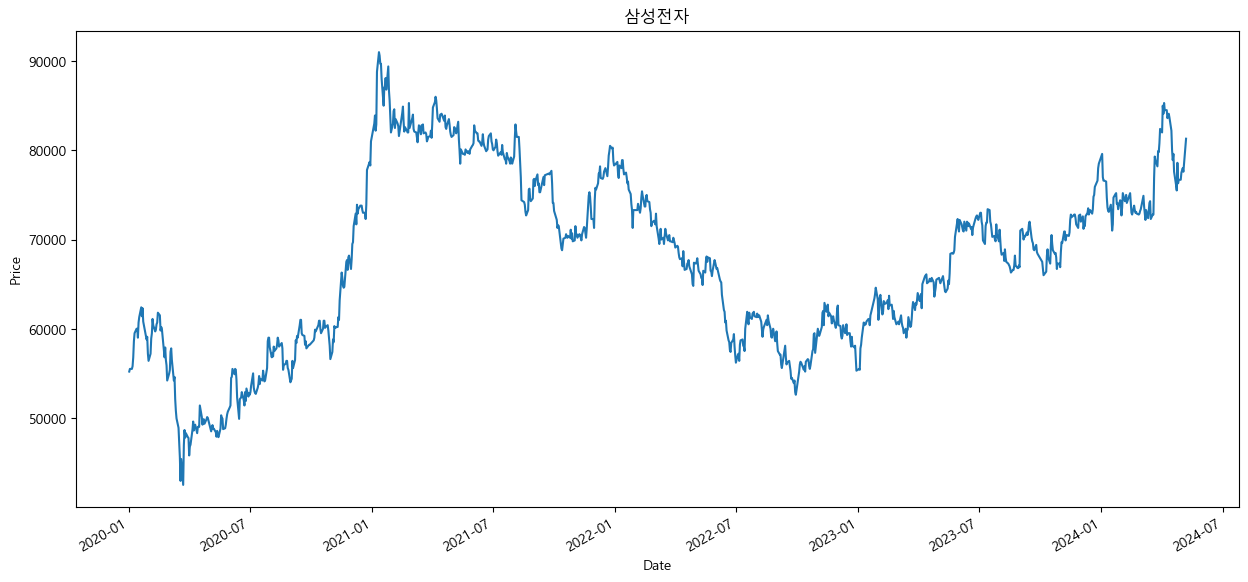

In [4]:
plt.figure(figsize=(15,7))
plt.title("삼성전자")
price_data.Close.plot()
plt.ylabel("Price")
plt.show()

그래프를 보니 삼성전자가 단기간에 급등한 것이 보인다. (저때 팔고 나왔더라면..)

In [5]:
# 삼성전자의 종가를 이용해 RSI, RMI를 계산
def rsi(ohlc: pd.DataFrame,y_label, period: int = 14): 
    delta = ohlc[y_label].diff() 
    ups, downs = delta.copy(), delta.copy() 
    ups[ups < 0] = 0 
    downs[downs > 0] = 0 
    AU = ups.ewm(com = period-1, min_periods = period).mean() 
    AD = downs.abs().ewm(com = period-1, min_periods = period).mean()
    RS = AU/AD 
    return pd.Series(100 - (100/(1 + RS)), name = "RSI")
def rmi(ohlc: pd.DataFrame,y_label, period: int = 14):
    delta = ohlc[y_label].diff(periods = 5) 
    ups, downs = delta.copy(), delta.copy() 
    ups[ups < 0] = 0 
    downs[downs > 0] = 0 
    AU = ups.ewm(com = period-1, min_periods = period).mean() 
    AD = downs.abs().ewm(com = period-1, min_periods = period).mean()
    RM = AU/AD 
    return pd.Series(100 - (100/(1 + RM)), name = "RMI")

위의 함수가 RSI를 계산하는 함수, 아래가 RMI를 계산하는 함수이다.   
※ 한 가지 참고할 사항이 있다. 위의 식대로 계산하는 RSI는 네이버과 동일하고 KB증권 기준과는 다르다. 각 증권사 별 계산식이 다르다고하니 참고 바란다.

In [6]:
RSI_df = rsi(price_data, "Close",14)
RMI_df  = rmi(price_data, "Close",14)
price_data["RSI"] = RSI_df
price_data["RMI"] = RMI_df

수집된 삼성전자의 데이터에 종가인 Close를 입력하고 기간 14일로 설정하면 지표값이 계산이 된다.   
RSI 기준 14일 기준이기 때문에 최초 수집된 일자의 15일째 되는 날부터 값이 생성이 된다.

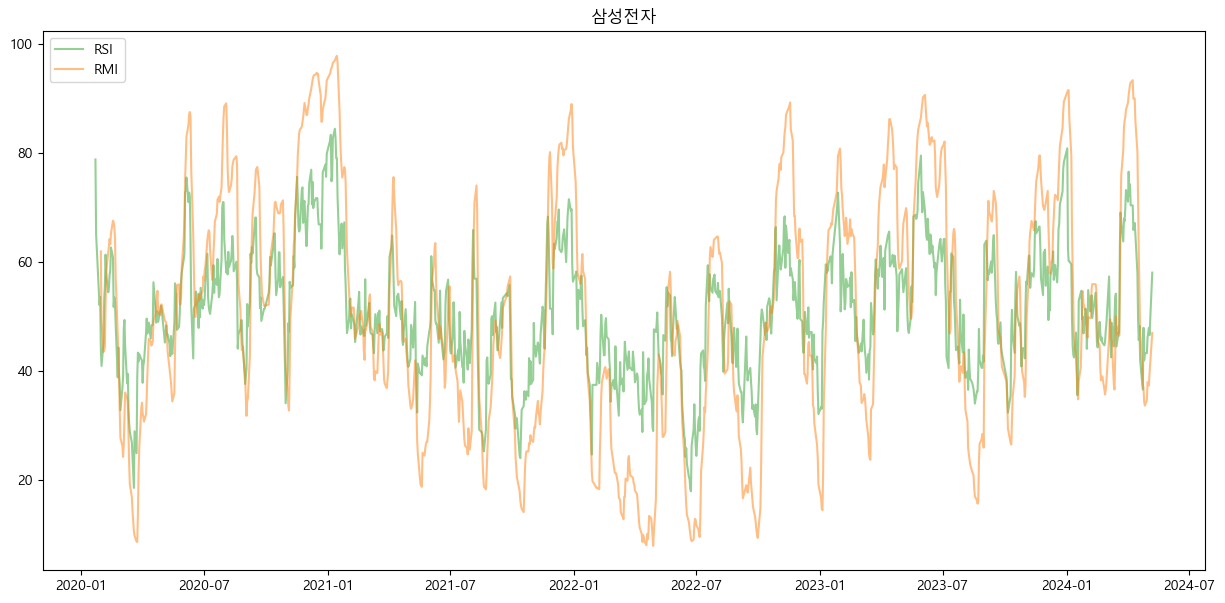

In [7]:
plt.figure(figsize=(15,7))
plt.title("삼성전자")
plt.plot(price_data['RSI'], label='RSI',color = "tab:green",alpha = 0.5)
plt.plot(price_data['RMI'], label='RMI',color = "tab:orange",alpha = 0.5)
plt.legend(loc = "best")
plt.show()

계산된 RSI, RMI 지표이다.   
20년부터 약 3년간의 지표값을 나타냈기 때문에 변동이 심해 보인다.   
   
각각의 지표를 주가와 같이 확인해보자

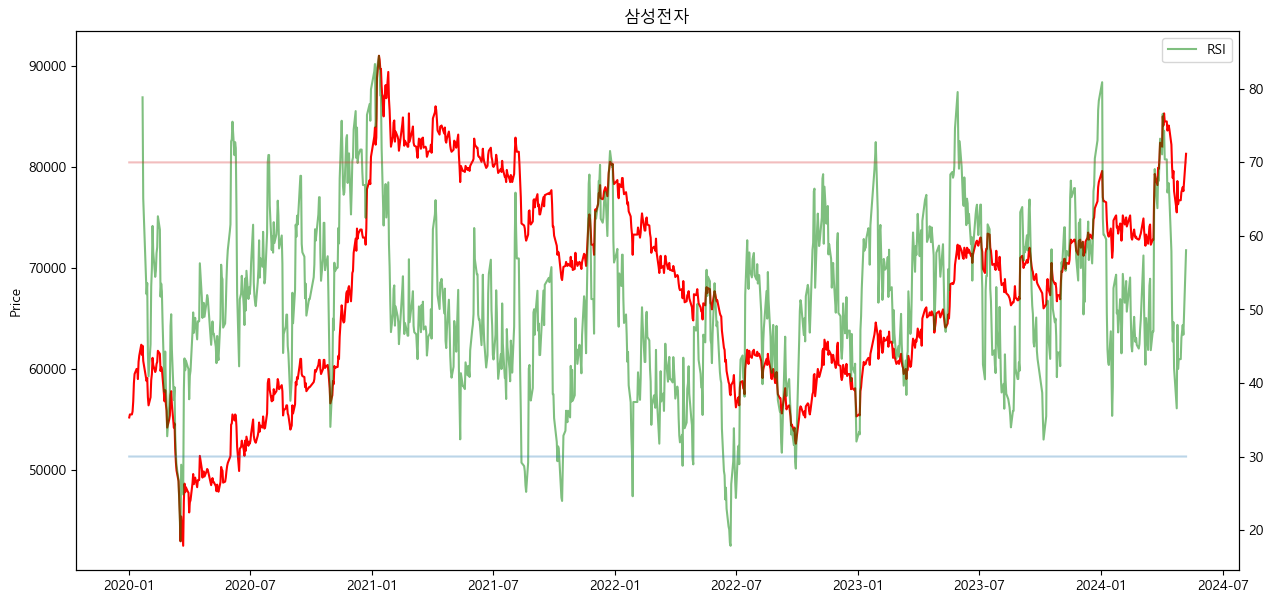

In [8]:
price_data["lower"] = 30
price_data["upper"] = 70

fig, ax1 = plt.subplots(figsize = (15,7)) 
ax1.set_ylabel('Price') 
ax1.plot(price_data["Close"],color = "red",alpha = 1, zorder=3)

ax2 = ax1.twinx() 
ax2.plot(price_data["RSI"],color = "green",alpha = 0.5)
ax2.plot(price_data["lower"] ,color = "tab:blue",alpha = 0.3)
ax2.plot(price_data["upper"],color = "tab:red",alpha = 0.3)
plt.legend(["RSI"],loc = 'best')
plt.title("삼성전자")
plt.show()

RSI의 매매 기준이 되는 값인 30과 70에 대해 기준선을 같이 표시했다.   
한 번씩 매수선과 매도선을 넘는 것이 보인다. 코로나가 터졌을 시점인 20년 3월 경에는 RSI값이 20 이하로 떨어져 매수 신호가 나타나고 있고, 주가가 최고에 달했을땐 RSI값이 90에 근접해 아주 강하게 매도 신호를 보내고 있는 것을 볼 수 있다.   
물론 RSI가 후행지표의 성격을 가지고 있지만, 이렇게 보면 참고할 가치가 매우 높아 보인다.   
   
최고점을 찍은 후에는 약 8개월 간 RSI값이 30과 70 사이에서 머무는 것을 볼 수 있다. 그 후에 매수신호만 간간이 나오는 데, 여기서 RSI의 한계를 보여준다. 주가가 한없이 추락하게 될 경우 계속해서 매수 신호가 나오기 때문에 본의 아니게 물타기가 되는 양상으로 간다. 따라서 다른 지표와 같이 보거나 종목 분석이 필요하다는 이유이다.   
   
다음으로 RMI를 확인해보자.

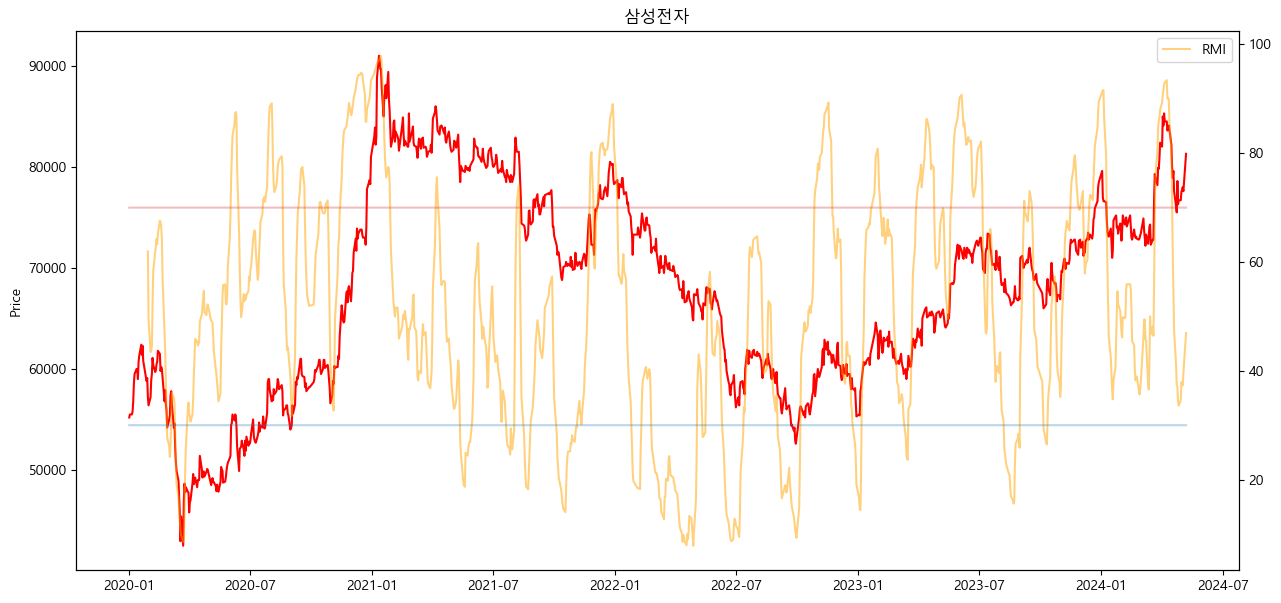

In [9]:
fig, ax1 = plt.subplots(figsize = (15,7)) 
ax1.set_ylabel('Price') 
ax1.plot(price_data["Close"],color = "red",alpha = 1, zorder=3)

ax2 = ax1.twinx() 
ax2.plot(price_data["RMI"],color = "orange",alpha = 0.5)
ax2.plot(price_data["lower"] ,color = "tab:blue",alpha = 0.3)
ax2.plot(price_data["upper"],color = "tab:red",alpha = 0.3)
plt.legend(["RMI"],loc = 'best')
plt.title("삼성전자")
plt.show()

RMI의 경우 전날 가격 기준이 아닌 5일 전 가격과 비교하기 때문에 변동 폭이 더 크지만, 진동이 적다.   
   
RSI와 RMI를 같이 비교해보자.

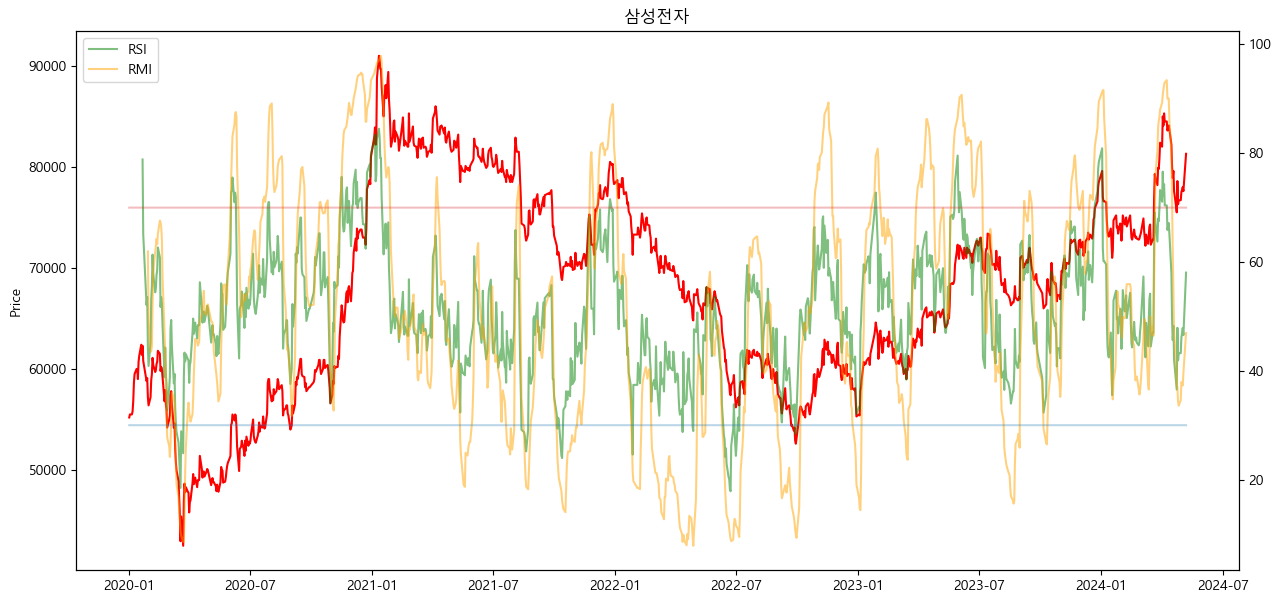

In [10]:
fig, ax1 = plt.subplots(figsize = (15,7)) 
ax1.set_ylabel('Price') 
ax1.plot(price_data["Close"],color = "red",alpha = 1, zorder=3)

ax2 = ax1.twinx() 
ax2.plot(price_data["RSI"],color = "green",alpha = 0.5)
ax2.plot(price_data["RMI"],color = "orange",alpha = 0.5)
ax2.plot(price_data["lower"] ,color = "tab:blue",alpha = 0.3)
ax2.plot(price_data["upper"],color = "tab:red",alpha = 0.3)
plt.legend(["RSI","RMI"],loc = 'best')
plt.title("삼성전자")
plt.show()

초록색 선이 RSI, 주황색 선이 RMI이다.   
RSI로는 매수 신호가 나타나지 않지만, RMI에는 매수 신호가 나타나는 구간이 여럿 보인다. 그 반대인 매도 신도도 마찬가지이다. 이 경우에는 단기적인 매매로 활용 가능할 듯싶다.   
RMI는 급변하는 주가에 대한 대응하기 좋고, 매매 시그널 포착된다. 하지만, 여전히 하락장에서는 매수신호가 지속적으로 나는 것을 볼 수 있다.   
   
여기까지 파이썬으로 RSI와 RMI를 구현하고 삼성전자를 대상으로 간단하게 지표 분석을 해보았다.   
RSI지표도 매매시점에 대한 참고 지표로 활용이 가능하다 판단이 되어 자동 매매로 활용했을 땐 얼마나 수익성을 낼 수 있는지 테스트해보고자 한다. 또한, 전략을 바꿔가면서(매매 기준 값 변경) 접근했을 때 수익성이 어떻게 달라지는 지도 확인하면서 투자 전략을 세우고자 한다.   

# 3. 투자지표를 활용한 매매 시점 모니터링 - 백테스팅

이전 글에서 RSI, RMI 지표를 파이썬으로 구현했다.   
한 종목을 선택한 후 지표와 주가의 추이도 그래프로 확인했다.   
그럼 이제 특정 기준으로 매매를 자동으로 진행했을 때 수익이 나는지, 수익금을 얼마인지 테스트를 해봐야 RSI지표가 가치 있는 지표인지 확인할 수 있기 때문에 벡테스팅을 하고자 한다.   
   
우선 필요한 패키지를 import 하는 것으로 시작한다.

In [24]:
import pandas as pd
import numpy as np
import datetime 
import time 
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import copy

df_krx = fdr.StockListing('KRX')
kospi_data = df_krx[(df_krx["Market"]=="KOSPI") & (~df_krx["Code"].isna())]

Kospi에 있는 종목으로 테스트를 할 예정이기 때문에 필터를 걸어 대상 데이터를 추려놓는다.

In [25]:
save_path = "trading_simulation/trading_simulation_test"

ks = df_krx[df_krx["Name"]=="삼성전자"]

target_stock = ks.Name.values[0]

price_data = fdr.DataReader(ks.Code.values[0],"2012-12-1")
price_data["stock_name"]=target_stock
RSI_df = rsi(price_data, "Close",14)
RMI_df = rmi(price_data, "Close",14)
price_data["RSI"] = RSI_df
price_data["RMI"] = RMI_df

price_data.tail()

,Open,High,Low,Close,Volume,Change,stock_name,RSI,RMI
Date,,,,,,,,,
2024-04-29,77400,77600,76200,76700,14664474,0.000000,삼성전자,43.244129,34.586725
2024-04-30,77000,78500,76600,77500,19007007,0.010430,삼성전자,46.106379,37.919283
2024-05-02,77600,78600,77300,78000,18900640,0.006452,삼성전자,47.875680,37.305256
2024-05-03,79000,79000,77500,77600,13151889,-0.005128,삼성전자,46.558816,39.587850
2024-05-07,79600,81300,79400,81300,24779970,0.047680,삼성전자,58.052486,46.948176


save_path는 벡테스팅을 하는 동안 거래 기록을 저장하기 위한 경로이다.   
벡테스팅은 삼성전자로 진행해보고자 한다. 데이터를 2012년 12월부터 수집한다. RSI계산을 위해 앞의 14일의 가격이 더 필요하기 때문에 12월 부터 테스트 기간을 2013년부터 2022년 현재까지로 약 10년을 기간으로 한다.

In [26]:
def save_txt(filename, lines, line_col):
    lines.insert(0,0)
    lines.append(0)
    if line_col is not None:
        line_col.insert(0, "Non")
        line_col.append("Non")
    with open(filename, 'a') as f:
        if line_col is not None:
            f.writelines(str(line_col))
            f.write("\n")
            
        f.writelines(str(lines))
        f.write("\n")

meta_info = ["name","time","보유KRW", "보유주","price","총자산",
             "TAG", "stock","money","tax","target_index"]
save_txt(save_path+".txt", meta_info, None)
log_info = ["name","time","price","target_index","buy","sell",
            "current_stock","avg_price","yield","total_money"]
save_txt(save_path+"_log.txt", log_info, None)

log_info = ["time","money"]
log_info.append(target_stock)
log_info.append(target_stock+"_price")
    
save_txt(save_path+"_total_price_log.txt", log_info, None)

위의 코드로 거래 log와 일 별 주가 변동에 의한 현 자산의 기록을 위한 save파일의 Header를 저장한다.   
header가 작 정의되어야 벡테스팅 후 시각화하는데 편리하다.

In [27]:
class set_init():
    def __init__(self,stock_list,save_path,seed_money,set_base_buy):
        self.money = seed_money
        self.total_money = seed_money
        self.stock_list = stock_list
        self.stock_count = 0
        self.now_rmi_list = 0
        self.now_rsi_list = 0
        self.stock_price = 0
        self.my_asset_price = 0
        self.v1 = 1
        self.v2 = 1
        self.save_path = save_path
        self.set_stand_price = set_base_buy
        
        
    def set_data(self,tmp,target_index):
        self.buy_list = 0
        self.sell_list = 0
        self.stock_price = tmp.tail(1).Close.values[0]
        self.now_index_list = tmp[target_index].values[0]
        self.time_print =  tmp.index.values[0]
        self.time_check =  tmp.ts.values[0]
        self.total_money = self.money + np.round(np.dot(self.stock_count,self.stock_price),6)
        
    def buy(self):
        money2 = copy.copy(self.money)
        trading_fee = 0
        if self.money < self.stock_price:
            buy_stock = 0
            buy_money = 0
            
        elif self.money <= self.set_stand_price : 
            buy_stock = money2 // self.stock_price
            buy_money = buy_stock * self.stock_price
            self.money = self.money - buy_money

        else : 
            have_money = money2
            if have_money>self.set_stand_price: have_money = self.set_stand_price
                
            buy_stock = have_money // self.stock_price
            buy_money = buy_stock * self.stock_price
            
            self.money = self.money - buy_money
        
        self.my_asset_price = self.my_asset_price + buy_money
        self.stock_count = np.round(self.stock_count + buy_stock,8)
        self.total_money = self.money + np.round(np.dot(self.stock_count,self.stock_price),6)
        print("buy ",self.time_print,self.stock_list,np.round(self.money),self.stock_count,
              buy_stock,buy_money,np.round(self.total_money))
        
        save_list =  [self.stock_list,self.time_check,self.money,self.stock_count,
                      self.stock_price,self.total_money,"buy",buy_stock,buy_money,"tax",
                      self.now_index_list]
        save_txt(self.save_path+".txt",save_list, None)
        self.buy_list =1
#         return self.money, self.stocks, buy_stock,buy_money, total_money,self.my_asset_price, tax
    
    def sell(self,all_tag):
        if self.stock_count == 0:
            sell_stock = 0
            sell_money = 0
            trading_fee = 0        
        elif self.my_asset_price <= self.set_stand_price or all_tag ==1: 
            sell_stock = self.stock_count
            self.my_asset_price = 0
            sell_money = sell_stock * self.stock_price
            tradig_fee = sell_money *0.0025
        else : 
            rate_ = np.round(self.set_stand_price/self.my_asset_price,2)
            sell_stock = int(self.stock_count * rate_)
            
            self.my_asset_price = self.my_asset_price - self.my_asset_price * (sell_stock/self.stock_count)

            sell_money = sell_stock * self.stock_price
            tradig_fee = sell_money *0.0025

        self.stock_count = np.round(self.stock_count - np.round(sell_stock,8),8)

        sell_money = sell_money - tradig_fee
        self.money = self.money + np.round(sell_money,2)
        self.total_money = self.money + np.round(np.dot(self.stock_count,self.stock_price),6)
        if all_tag ==1:            
            print("all_sell",self.time_print,self.stock_list,np.round(self.money),self.stock_count,
                  sell_stock,sell_money,np.round(self.total_money))

            save_list = [self.stock_list,self.time_check,self.money,self.stock_count,
                         self.stock_price,self.total_money,"all_sell",sell_stock,sell_money,tradig_fee,
                         self.now_index_list]
        else:
            print("sell",self.time_print,self.stock_list,np.round(self.money),self.stock_count,
                  sell_stock,sell_money,np.round(self.total_money))

            save_list = [self.stock_list,self.time_check,self.money,self.stock_count,
                         self.stock_price,self.total_money,"sell",sell_stock,sell_money,tradig_fee,
                         self.now_index_list]
        save_txt(self.save_path+".txt", save_list, None)
        self.sell_list =1
#         return self.money, self.stocks, sell_stock,sell_money,total_money,self.my_asset_price,tradig_fee


    def log_recording(self):
        log_info = [self.stock_list,self.time_check,self.stock_price,
                    self.now_index_list,
                    self.buy_list,self.sell_list,
                    self.stock_count,
                    self.v1,self.v2,
                    self.total_money]
        save_txt(self.save_path+"_log.txt", log_info, None)

        log_info2 = [self.time_check,self.money]+[self.stock_count]+[self.stock_price]
        save_txt(self.save_path+"_total_price_log.txt", log_info2, None)
        
        
    def yield_table(self):
        try:
            self.v1 = self.my_asset_price / self.stock_count
            self.v2 = self.stock_price * self.stock_count / self.my_asset_price
        except:
            None

벡테스팅을 하기 위한 class이다.   
class 내부에 자산, 현재 가격, 투자 지표 등을 저장해놓고 사용하는 것이 편해서 위의 코드 방식으로 구현했다. 조금 복잡하지만, 하나하나 뜯어보면 간단한 로직으로 구현되어있다.함수 하나씩 설명해보자면,   
   
```python
def __init__(self,stock_list,save_path,seed_money,set_base_buy):
    self.money = seed_money        # 최초 보유 현금
    self.total_money = seed_money  # 총 자산(현금 + 투자금액 / 최초는 보유현금과 동일)
    self.stock_list = stock_list   # 벡테스팅 기업 이름
    self.stock_count = 0           # 보유 주식 수
    self.now_index_list = 0        # 투자 지표
    self.stock_price = 0           # 투자 종목 현재 주가
    self.my_asset_price = 0        # 투자 종목 투자 금액(보유 주식 수 * 현재 주가)
    self.v1 = 1                    # 평단가
    self.v2 = 1                    # 평가손익률
    self.save_path = save_path     # 저장 경로
    self.set_stand_price = set_base_buy  # 매수/매도 기준 금액
```
   
__init__함수는 객체가 생성될 때 필요한 변수들을 선언해 준다. 각 내용은 주석으로 달아 놓겠다.   
   
```python
def set_data(self,tmp,target_index):
    self.buy_list = 0
    self.sell_list = 0
    self.stock_price = tmp.tail(1).Close.values[0]
    self.now_index_list = tmp[target_index].values[0]
    self.time_print =  tmp.index.values[0]
    self.time_check =  tmp.ts.values[0]
    self.total_money = self.money + np.round(np.dot(self.stock_count,self.stock_price),6)
```
   
set_data 함수는 일 별 주가가 입력되는 함수이다. 가격, 투자지표, 날짜와 현재 기준 총자산을 입력받는다.   
   
```python
def buy(self):
    money2 = copy.copy(self.money)
    trading_fee = 0
    if self.money < self.stock_price:
        buy_stock = 0
        buy_money = 0

    elif self.money <= self.set_stand_price : 
        buy_stock = money2 // self.stock_price
        buy_money = buy_stock * self.stock_price
        self.money = self.money - buy_money

    else : 
        have_money = money2
        if have_money>self.set_stand_price: have_money = self.set_stand_price

        buy_stock = have_money // self.stock_price
        buy_money = buy_stock * self.stock_price

        self.money = self.money - buy_money

    self.my_asset_price = self.my_asset_price + buy_money
    self.stock_count = np.round(self.stock_count + buy_stock,8)
    self.total_money = self.money + np.round(np.dot(self.stock_count,self.stock_price),6)
    print("buy ",self.time_print,self.stock_list,np.round(self.money),self.stock_count,
          buy_stock,buy_money,np.round(self.total_money))

    save_list =  [self.stock_list,self.time_check,self.money,self.stock_count,
                  self.stock_price,self.total_money,"buy",buy_stock,buy_money,trading_fee,
                  self.now_index_list]
    save_txt(self.save_path+".txt",save_list, None)
    self.buy_list =1
```
    
매수 함수이다. 투자 전략에 따라 매수기준에 통과하면 매수 함수 내 로직이 실행된다.   
주요하게 봐야 할 곳은 if문이다. 만약 보유 현금이 현재 주가보다 작으면 매수 없이 통과한다.   
두 번째 조건으로 보유 현금이 1회 매매 기준 금액보다 작으면 보유 현금을 모두 해당 종목에 매수한다.   
세 번째 조건으로 보유 현금이 1회 매매 기준 금액보다 높으면 1회 매매 기준 금액만큼 매수한다.   
   
분할 매수를 위해 위와 같은 로직을 설계했다. 1회 매매 기준 금액을 100만 원으로 설정해두었다면, 투자 전략 시뮬레이션 중 매수 기준에 충족할 때마다 100만 원씩 구매하는 것이다.   
   
if 문 아래의 코드는 매수 후 현재 매수 총금액, 보유 주식 수, 총 자산 등을 기록하고 저장한다.   
   
```python
def sell(self,all_tag):
    if self.stock_count == 0:
        sell_stock = 0
        sell_money = 0
        trading_fee = 0        
    elif self.my_asset_price <= self.set_stand_price or all_tag ==1: 
        sell_stock = self.stock_count
        self.my_asset_price = 0
        sell_money = sell_stock * self.stock_price
        trading_fee = sell_money *0.0025
    else : 
        rate_ = np.round(self.set_stand_price/self.my_asset_price,2)
        sell_stock = int(self.stock_count * rate_)

        self.my_asset_price = self.my_asset_price - self.my_asset_price * (sell_stock/self.stock_count)

        sell_money = sell_stock * self.stock_price
        trading_fee = sell_money *0.0025

    self.stock_count = np.round(self.stock_count - np.round(sell_stock,8),8)

    sell_money = sell_money - trading_fee
    self.money = self.money + np.round(sell_money,2)
    self.total_money = self.money + np.round(np.dot(self.stock_count,self.stock_price),6)
    if all_tag ==1:            
        print("all_sell",self.time_print,self.stock_list,np.round(self.money),self.stock_count,
              sell_stock,sell_money,np.round(self.total_money))

        save_list = [self.stock_list,self.time_check,self.money,self.stock_count,
                     self.stock_price,self.total_money,"all_sell",sell_stock,sell_money,trading_fee,
                     self.now_index_list]
    else:
        print("sell",self.time_print,self.stock_list,np.round(self.money),self.stock_count,
              sell_stock,sell_money,np.round(self.total_money))

        save_list = [self.stock_list,self.time_check,self.money,self.stock_count,
                     self.stock_price,self.total_money,"sell",sell_stock,sell_money,trading_fee,
                     self.now_index_list]
    save_txt(self.save_path+".txt", save_list, None)
    self.sell_list =1
```
   
매도 함수도 비슷한 로직으로 구현하였지만, 세부적으로 몇 가지가 다르다.   
1회 매매 기준 금액보다 작으면 전부 매도, 크면 1회 매매 기준 금액만큼 매도한다.   
여기서 조건문에 all_tag 변수가 있다. 만약 전량 매도를 해야 할 경우 1회 매매 기준 금액과 상관없이 보유량 전부를 매도하는 조건을 붙였다.   
또한 매매수수료를 계산해야 한다. trading_fee변수에 몇 %를 수수료로 낼 것인지 적용한다. 코드상에서는 0.025%를 적용했다.   
마찬가지로 조건문 통과 후 보유 주식 수, 보유 금액, 총액 등을 계산 저장한다.   
   
```python
def log_recording(self):
    log_info = [self.stock_list,self.time_check,self.stock_price,
                self.now_index_list,
                self.buy_list,self.sell_list,
                self.stock_count,
                self.v1,self.v2,
                self.total_money]
    save_txt(self.save_path+"_log.txt", log_info, None)

    log_info2 = [self.time_check,self.money]+[self.stock_count]+[self.stock_price]
    save_txt(self.save_path+"_total_price_log.txt", log_info2, None)


def yield_table(self):
    try:
        self.v1 = self.my_asset_price / self.stock_count
        self.v2 = self.stock_price * self.stock_count / self.my_asset_price
    except:
        None
```
   
마지막 두 함수중 log_recording함수는 매매 기록과 전체 거래 기록을 일 별로 남기기 위한 함수이다.   
후에 시각화할 때 일 별 거래 및 총 자산 현황을 보기 위해 기록한다.   
yield_table은 평균 단가, 손익률을 계산하는 함수로 매 일별 실행된다.   
   
코드상에 불필요해 보이는 변수들이 존재할 수도 있다. 애초에 여러 종목을 동시에 모니터링하며 자동 매매를 할 수 있게 설계했기 때문이다. 즉, 실제 투자처럼 여러 종목을 후보에 올려두고 매매 신호가 나오면 현재 보유 금액에서 투자할 수 있도록 하기 위함이다. 이는 단일 종목 벡 테스팅과 시각화 자료 설명 이후 소개하도록 하겠다.

In [28]:
def trading_simulation(bitrade,price_data,target_index,lower_cut,upper_cut,stop_loss):
    lower_list = False
    upper_list = False
    plot_value = []
    for st in price_data.index:
        all_tag = 0
        dt64 = np.datetime64(st)
        ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
        #ts = (dt64 - np.datetime64('1970-01-01')) / np.timedelta64(1, 's')

        tmp = price_data[price_data.index == st]
        tmp["ts"]=ts
        bitrade.set_data(tmp,target_index)
    #     bitrade.set_stand_price = int(bitrade.total_money *0.5)
        bitrade.yield_table()
        if bitrade.v2 *100-100 < stop_loss :
            all_tag = 1
            if bitrade.stock_count >0:
                bitrade.sell(all_tag)
            lower_list = False
            upper_list = False

        else:        
            if bitrade.now_index_list <lower_cut:
                lower_list = True

            elif bitrade.now_index_list >= lower_cut and lower_list == True:  
                if bitrade.money >100000:
                    bitrade.buy()
                lower_list = False

            elif bitrade.now_index_list >upper_cut:
                upper_list = True

            elif bitrade.now_index_list <= upper_cut and upper_list == True:
                if bitrade.stock_count >0:
                    bitrade.sell(all_tag)
                upper_list = False

        bitrade.log_recording()
        plot_value.append(int(bitrade.money + (bitrade.stock_count*bitrade.stock_price)))
    return plot_value

시뮬레이션하기 위한 전략이 구현된 함수이다.   
나는 RSI 기준으로 기본 전략을 구현했다. now_index_list에 RSI 값이 들어가는 것으로 보면 된다.매수 매도 컷을 70, 30으로 잡았다.   
stop_loss는 손익률이 -로 떨어질 때 손절선을 지정하기 위함이다.   
예를 들어 -5프로 이상 떨어지면 전량 매도하는 것을 말한다.   
   
전략을 간단히 설명하자면, RSI가 30 이하일 때 lower_list의 스위치가 True로 활성화된다. 이는 30 이상이 넘어가면 매수하기 위한 대기 상태라 보면 된다. RSI가 30이 넘어가는 순간 매수하고 lower_list가 False로 비활성화된다. 이제 30~70사이에서 왔다갔다해도 추가 매수를 하지 않는다.   
70이 넘어가면 upper_list가 True로 활성화 된다. 역시 70 이하로 떨어지는 순간 매도를 하고, 대기한다.   
여기까지가 벡테스팅을 하기 위한 필수 함수들을 설명했다.

In [29]:
%%time
lower_cut = 30
upper_cut = 70
seed_money = 10000000
set_base_buy = 5000000
stop_loss = -100
bitrade = set_init(target_stock,save_path,seed_money,set_base_buy)
plot_value = trading_simulation(bitrade,price_data,"RSI",lower_cut,upper_cut,stop_loss)
print("DONE")

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

buy  2013-06-18T00:00:00.000000000 삼성전자 5006800 180 180 4993200 10000000
buy  2013-06-27T00:00:00.000000000 삼성전자 25720 366 186 4981080 9827200


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

sell 2013-09-13T00:00:00.000000000 삼성전자 5158815.0 183 183 5133095.1 10304775.0
sell 2013-09-17T00:00:00.000000000 삼성전자 10218893.0 0 183 5060078.1 10218893.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

buy  2014-01-13T00:00:00.000000000 삼성전자 5220193.0 193 193 4998700 10218893.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

buy  2014-02-06T00:00:00.000000000 삼성전자 234553.0 391 198 4985640 10079933.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

buy  2014-09-25T00:00:00.000000000 삼성전자 3353.0 401.0 10.0 231200.0 9274473.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

sell 2014-12-10T00:00:00.000000000 삼성전자 5153087.0 205.0 196 5149733.4 10552787.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

buy  2015-08-07T00:00:00.000000000 삼성전자 154687.0 425.0 220 4998400 9810687.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

sell 2015-10-12T00:00:00.000000000 삼성전자 5383183.0 217.0 208 5228496.0 10851583.0
sell 2015-11-04T00:00:00.000000000 삼성전자 10902151.0 9.0 208 5518968.0 11141551.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

buy  2016-01-19T00:00:00.000000000 삼성전자 5913691.0 222.0 213 4988460 11112931.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

sell 2016-04-01T00:00:00.000000000 삼성전자 11348609.0 9.0 213 5434918.65 11578829.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

sell 2016-06-10T00:00:00.000000000 삼성전자 11601057.0 0.0 9.0 252447.3 11601057.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

buy  2017-08-14T00:00:00.000000000 삼성전자 6606057.0 111.0 111 4995000 11601057.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

sell 2017-09-26T00:00:00.000000000 삼성전자 12325981.0 0.0 111.0 5719924.35 12325981.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

buy  2018-02-12T00:00:00.000000000 삼성전자 7342501.0 109.0 109 4983480 12325981.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

buy  2018-10-29T00:00:00.000000000 삼성전자 2374501.0 229.0 120 4968000 11855101.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

buy  2018-12-28T00:00:00.000000000 삼성전자 13801.0 290.0 61.0 2360700.0 11236801.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

sell 2019-02-08T00:00:00.000000000 삼성전자 5286985.0 172.0 118 5273184.0 12992585.0
sell 2019-02-15T00:00:00.000000000 삼성전자 10615430.0 56.0 116 5328445.5 13194230.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

buy  2019-05-10T00:00:00.000000000 삼성전자 5639030.0 172.0 116 4976400 13017830.0
buy  2019-05-20T00:00:00.000000000 삼성전자 641030.0 291.0 119 4998000 12863030.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

sell 2019-07-01T00:00:00.000000000 삼성전자 6033116.0 175.0 116 5392086.0 14188116.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

sell 2019-09-25T00:00:00.000000000 삼성전자 11740113.0 58.0 117 5706996.75 14576313.0
sell 2019-09-27T00:00:00.000000000 삼성전자 14540295.0 0.0 58.0 2800182.0 14540295.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

buy  2020-03-24T00:00:00.000000000 삼성전자 9563595.0 106.0 106 4976700 14540295.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

sell 2020-06-11T00:00:00.000000000 삼성전자 15305006.0 0.0 106.0 5741410.5 15305006.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stock_price * self.stock_count / self.my_asset_price
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

buy  2021-08-24T00:00:00.000000000 삼성전자 10315406.0 66.0 66 4989600 15305006.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

buy  2021-10-07T00:00:00.000000000 삼성전자 5375006.0 135.0 69 4940400 15041006.0
buy  2021-10-15T00:00:00.000000000 삼성전자 397906.0 206.0 71 4977100 14838506.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

sell 2021-12-27T00:00:00.000000000 삼성전자 5997871.0 136.0 70 5599965.0 16905071.0
buy  2022-01-28T00:00:00.000000000 삼성전자 1013471.0 204.0 68 4984400 15966671.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

buy  2022-04-13T00:00:00.000000000 삼성전자 51671.0 218.0 14.0 961800.0 15028271.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

sell 2023-01-30T00:00:00.000000000 삼성전자 4408451.0 149.0 69 4356780.75 13840151.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

sell 2023-06-01T00:00:00.000000000 삼성전자 9217598.0 81.0 68 4809147.0 14960498.0
sell 2023-06-05T00:00:00.000000000 삼성전자 14081009.0 13.0 68 4863411.0 15013109.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: Setting

sell 2024-01-03T00:00:00.000000000 삼성전자 15079507.0 0.0 13.0 998497.5 15079507.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

DONE
CPU times: total: 23.4 s
Wall time: 32.4 s


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\3316673275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["ts"]=ts
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:118: RuntimeWarning: invalid value encountered in scalar divide
  self.v1 = self.my_asset_price / self.stock_count
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16844\2120971077.py:119: RuntimeWarning: invalid value encountered in scalar divide
  self.v2 = self.stoc

이제 벡테스팅을 진행해보자.   
위에서 수집 가공한 삼성전자의 2013년 데이터부터 사용을 했다.   
시드 머니는 1,000만원, 1회 매매 기준 금액은 500만원으로 설정하고, 손절선은 -100%으로 적용했다.   
-100%란 뜻은 원금이 다 잃었을 때란 말인데 이는 즉 손절선을 적용하지 않겠다는 말과 같다.   
   
set_init로 종목 이름, 저장 경로, 시드 머니, 1회 매매 기준 금액을 입력해 객체를 생성한다. bitrade란 객체가 생성이 되었다.   
벡테스팅을 위해 trading_simulation함수를 실행시킨다. bitrade 객체와 주가 데이터, 사용할 투자 지표 이름, 매매 하한, 상한선, 손절선을 입력하면 2013년부터 시작해 자동으로 매매를 진행해 결과를 낸다.

매매가 진행될 때마다 로그를 출력하도록 했다.   
매수, 매도 일시, 구매 금액 보유 주식 수 등을 볼 수 있다.   
   
로그로만 보면   
조금 복잡하기에 그래프로 나타내었다.

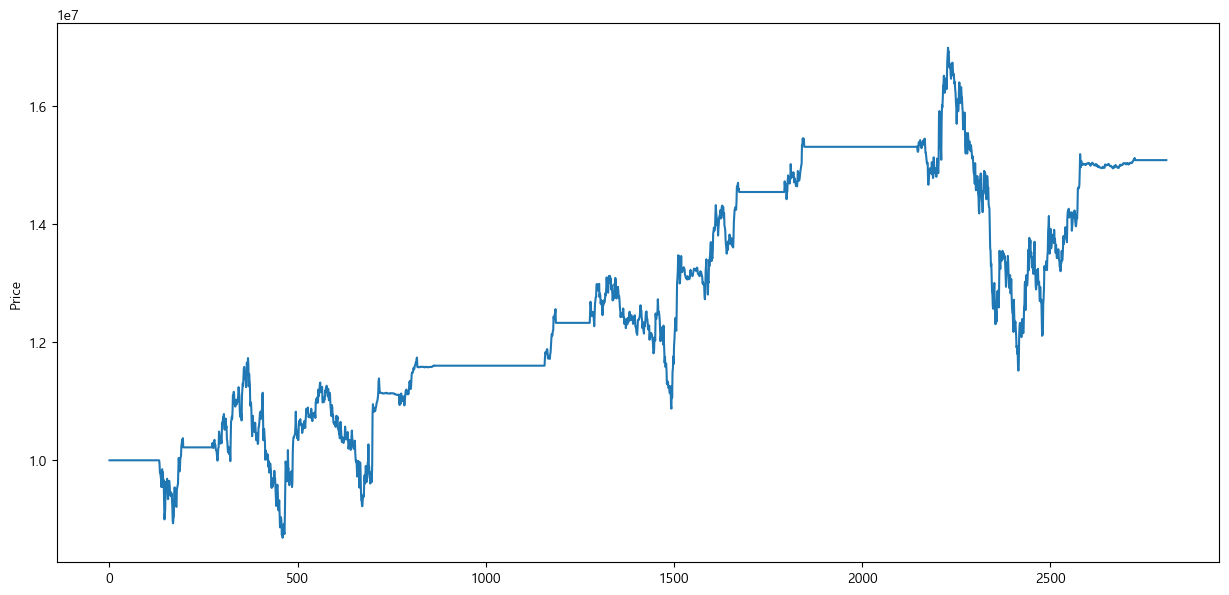

In [30]:
fig, ax1 = plt.subplots(figsize = (15,7)) 
ax1.set_ylabel('Price') 
plt.plot(plot_value)
plt.show()

우선, 시드 머니 기준으로 현재 총자산. 10년간 1000만원이 약 1400만원이 되었다(..?)   
   
```python
file_path = "./trading_simulation/trading_simulation_test"
log1 = read_log(file_path+"_log")
log1["lower"] = lower_cut
log1["upper"] = upper_cut
log_plot(log1)
```
   
저장된 로그를 불러와 시각화.   
파란색이 매수, 빨간색이 매도, 하늘색 그래프가 주가, 연두색 그래프가 RSI 지표, 회색 바가 총 자산 대비 해당 종목 보유 비율.   
   
```python
color_list = "moccasin"
color_list2 = "tab:orange"
profit_rate_plot(file_path,color_list,color_list2)
```
   
매수, 매도 시 손익률 수준. 매도 시점에 몇 %의 손익률이었는지 볼 수 있다.   
   
```python
log_total = total_price_df(file_path,target_stock,seed_money)
total_plot(log_total,target_stock,color_list,True)
```
   
보유 자산 대비 삼성전자 투자 비율과 손익률를 시각화.   
```python
# 연평균 수익률 조회
np.round((np.power((log_total.tail(1)["total_money"].values[0] / seed_money),1/10)-1)*100,2)
```
   
연평균 수익률 : 2.78   
```python
# 연도별 거래내역 조회
for i in range(2013,2023):
    log_plot(log1,str(i),str(i+1))
```
   
연도 별로 거래 기록을 시각화한다. 앞서 전체 기록을 봤는데 기간이 길어질수록 촘촘해져 보기가 어렵기 때문에 특정 기간 별로 조회할 수 있게 구현하였다.   
   
대략 위와 같은 그림으로 출력이 된다.   
   
결국 벡테스팅 결과가 의도한 바에 의해 혹은 어떤 과정으로 매매를 진행했는지 이해하고 있어야만 자동 매매 프로그램을 만들 수 있기에, 전략을 구현하기 이전에 시각화 부분에 공을 들였다.   
   
글이 너무 길어져서 시각화된 결과와 코드는 다음 글에서 이어서 설명하겠다.

# 4. 투자지표를 활용한 매매 시점 모니터링 - 시각화

이전 글에서 자동 매매의 결과를 시각화 자료를 간단히 소개했다.   
   
자동매매 전략을 짜기 전에 전략에 따른 매매 타이밍, 투자 금액 및 총자산의 흐름을 잘 파악하고 있어야 자동 매매 프로그램이 내가 의도한 대로 혹은 최선의 전략을 만들 수 있다.   
   
따라서 이번 글에서는 내가 만든 시각화 코드를 소개하고 설명하겠다.   
   
이전 글에서 자동 매매를 정상적으로 실행시켰다면 파일 세 개가 생성이 될 것이다.   
   
순서대로 설명하자면   
trading_simulation_test.txt 파일은   
```python
[0, 'name', 'time', '보유KRW', '보유주', 'price', '총자산', 'TAG', 'stock', 'money', 'trading_fee', 'target_index', 0]
[0, '삼성전자', 1371513600.0, 5006800, 180, 27740, 10000000, 'buy', 180, 4993200, 0, 35.420493345195524, 0]
[0, '삼성전자', 1372291200.0, 25720, 366, 26780, 9827200, 'buy', 186, 4981080, 0, 40.14866988453213, 0]
[0, '삼성전자', 1379030400.0, 5158815.1, 183, 28120, 10304775.1, 'sell', 183, 5133095.1, 12864.9, 69.5311975413225, 0]
[0, '삼성전자', 1379376000.0, 10218893.2, 0, 27720, 10218893.2, 'sell', 183, 5060078.1, 12681.9, 59.381278875752635, 0]
[0, '삼성전자', 1389571200.0, 5220193.199999999, 193, 25900, 10218893.2, 'buy', 193, 4998700, 0, 32.54077446441633, 0]
[0, '삼성전자', 1391644800.0, 234553.19999999925, 391, 25180, 10079933.2, 'buy', 198, 4985640, 0, 36.42119650212527, 0]
[0, '삼성전자', 1411603200.0, 3353.199999999255, 401.0, 23120, 9274473.2, 'buy', 10.0, 231200.0, 0, 32.06083482044599, 0]
```
자동 매매가 이루어졌을 때의 기록이다. TAG 컬럼에 buy 혹은 sell로 표시되며 주식수는 stock에 표시된다.   
   
trading_simulation_test_log.txt 파일은   
```python
[0, 'name', 'time', 'price', 'target_index', 'buy', 'sell', 'current_stock', 'avg_price', 'yield', 'total_money', 0]
[0, '삼성전자', 1356307200.0, 29480, 52.1554000373811, 0, 0, 0, 1, 1, 10000000, 0]
[0, '삼성전자', 1356480000.0, 29400, 51.071072580117594, 0, 0, 0, 1, 1, 10000000, 0]
[0, '삼성전자', 1356566400.0, 29920, 57.287166867049415, 0, 0, 0, 1, 1, 10000000, 0]
[0, '삼성전자', 1356652800.0, 30440, 62.4276604315165, 0, 0, 0, 1, 1, 10000000, 0]
[0, '삼성전자', 1357084800.0, 31520, 70.39649295689097, 0, 0, 0, 1, 1, 10000000, 0]
[0, '삼성전자', 1357171200.0, 30860, 61.77392682874736, 0, 0, 0, 1, 1, 10000000, 0]
[0, '삼성전자', 1357257600.0, 30500, 57.62763776538388, 0, 0, 0, 1, 1, 10000000, 0]
```

매 일 별 종가 및 투자지표(RSI), 매수 여부와 평단가, 총자산 등이 기록된다.   
   
trading_simulation_test_total_price_log.txt 파일은   
```python
[0, 'time', 'money', '삼성전자', '삼성전자_price', 0]
[0, 1354492800.0, 10000000, 0, 28600, 0]
[0, 1354579200.0, 10000000, 0, 28600, 0]
[0, 1354665600.0, 10000000, 0, 29100, 0]
[0, 1354752000.0, 10000000, 0, 29080, 0]
[0, 1354838400.0, 10000000, 0, 29600, 0]
[0, 1355097600.0, 10000000, 0, 29820, 0]
[0, 1355184000.0, 10000000, 0, 29520, 0]
[0, 1355270400.0, 10000000, 0, 29800, 0]
[0, 1355356800.0, 10000000, 0, 30660, 0]
```
매 일 별 종목 가격을 반영한 총자산이 계산된다.   
총자산을 따로 계산한 이유는 후에 여러 종목을 동시에 투자 후보에 올려두고 매매를 했을 경우 매 일 별 손익률 및 총자산을 확인하기 위함이다.   
   
테이블이 만들어졌으면 이를 시각화의 기초 자료로 사용한다.

In [31]:
file_path = "./trading_simulation/trading_simulation_test"

def read_log(file_path):
    log1 = pd.read_csv(file_path+".txt",sep = ",",encoding='cp949')
    log1 = log1.iloc[:,1:-1]
    log1.columns = ["name","time","price","target_index","buy","sell","current_stock","avg_price","yield","total_money"]
    log1["yield"] = log1["yield"].fillna(0)
    log1["yield"] = log1["yield"].replace(' nan',1)
    log1["yield"] = log1["yield"].astype(float)
    log1["yield"] = np.round((log1["yield"]-1)*100,2)
    log1.loc[log1["yield"]<= -99,"yield"] = 0
    log1["avg_price"] = log1["avg_price"].fillna(0)
    log1["avg_price"] = log1["avg_price"].replace(' nan',0)
    log1["avg_price"] = log1["avg_price"].astype(float)
    log1["avg_price"] = np.round(log1["avg_price"],0)
    log1.loc[log1["avg_price"]<=1,"avg_price"] = np.nan
    for i,ii in enumerate(log1.time):  
        log1.loc[i,"time"]  = datetime.datetime.utcfromtimestamp(ii)
    log1.set_index(log1.time,inplace= True)
    log1["target_index"] = log1["target_index"].replace(' nan',0)
    log1["target_index"] = log1["target_index"].astype(float)
    
    log1["stock_rate"] = log1["current_stock"]*log1["price"]/log1["total_money"]*100

    return log1

In [32]:
def log_plot(log1,start_day=None,last_day=None):
    if start_day is not None:
        log1 = log1[log1.index>=start_day]
    if last_day is not None:
        log1 = log1[log1.index<=last_day]
        
    log_p = log1[log1["buy"]==1]
    log_p = log1[log1["buy"]==1]
    fig, ax1 = plt.subplots(figsize = (14,7)) 
    ax1.set_ylabel('Price') 
    ax1.plot(log1["price"],color = "skyblue",alpha = 1, zorder=3)
    ax1.plot(log1["avg_price"],color = "black",alpha = 1, zorder=4)
    
    ax1.scatter(log_p.index,log_p["price"],s = 40,color = "blue", zorder=5)
    
    log_p = log1[log1["sell"]==1]
    ax1.scatter(log_p.index,log_p["price"],s = 40,color = "red", zorder=5)
    plt.legend(["price","avg_price","buy","sell"],loc = 'upper left')
    
    ax2 = ax1.twinx() 
    ax2.set_ylabel('Index') 
    ax2.plot(log1["target_index"],color = "green",alpha = 0.2)
    ax2.fill_between(log1.index,log1["stock_rate"],color = "black", zorder=5,alpha = 0.2)
    ax2.plot(log1["lower"],color = "blue",alpha = 0.2)
    ax2.plot(log1["upper"],color = "red",alpha = 0.2)
    ax2.set_ylim(0,100)
    plt.title(log1["name"].values[0])
    plt.legend(["target_index",'Stock_Rate'],loc = 'upper right')
    plt.show()

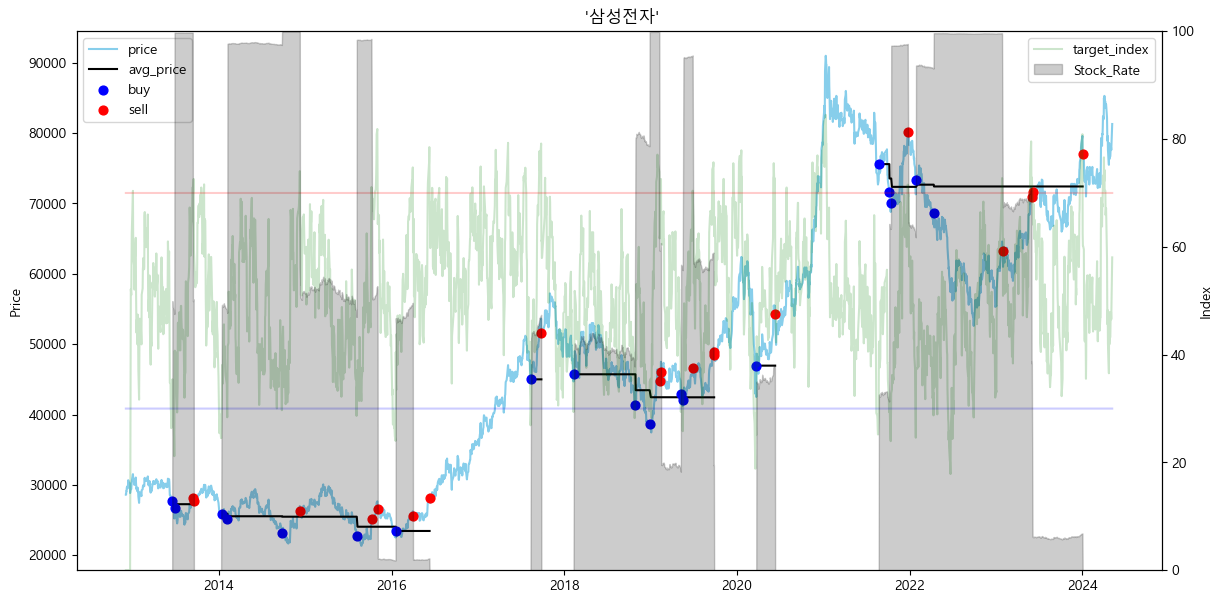

In [33]:
log1 = read_log(file_path+"_log")
log1["lower"] = lower_cut
log1["upper"] = upper_cut
log_plot(log1)

가장 처음 나타낸 그래프는 거래를 어느 시점에 했는지, 보유량을 얼만큼인지 알 수 있는 그래프이다. 위의 그래프의 x축은 2013년부터 22년 11월 초까지의 날짜를 나타낸다. 기간이 매우 길기 때문에 python에서 자동으로 연도만 표시했다. 기간을 짧게 하면 월 혹은 일 단위로 출력될 것이다.   
   
하늘색 선은 해당 종목의 일 별 종가를 나타낸다. 가격은 왼쪽 축의 20000\~95000 사이에 표시가 된다. 또한, 가격 선 위의 파란색 점은 매수 포인수, 빨간색 점은 매도 포인트를 나타낸다.   
즉, 점이 찍혀있는 날짜에 종가 기준으로 매수, 매도가 이루어졌다는 뜻이다.   
여기서 매수 기준은 연두색 선으로 표시가 된다. 나는 RSI 기준 30, 70선으로 매수, 매도를 했기 때문에 30과 70선도 같이 붉은색, 파란색으로 그려 넣었다. RSI값은 오른쪽 축에 0\~100 사이로 표시가 된다.   
다음 검은색 선이 파란색 매수 포인트 이후에 그려진 것이 보일 것이다. 매수 한 종목의 평단가를 나타내는 선이다. 왼쪽 가격 축과 동일한 값을 나타낸다. 전량 매도를 하면 해당 선은 나타나지 않고, 추가 매수를 하면 평단가가 조정이 된다. 이를 통해 어떤 가격대를 보유하고 있고 매매를 했는지 알 수 있다.   
마지막으로 회색의 bar그래프가 보인다. 이는 전체 총자산을 100으로 두었을 때 해당 종목을 총자산의 몇 %를 보유하고 있는지 나타낸다. 값의 범위가 0\~100으로 오른쪽 축인 RSI지표와 동일하기 때문에 왼쪽 축 값을 동일하게 사용하고 있다.   
   
정리하면,   
   
- 왼쪽 축
   - 하늘색 선 : 종가
   - 파란색 점 : 매수 포인트
   - 빨간색 점 : 매도 포인트
   - 검은색 선 : 평단가

- 오른쪽 축
   - 연두색 선 : RSI
   - 연 빨간색 선 : RSI 70 선
   - 연 파란색 선 : RSI 30 선
   - 회색 bar 그래프 : 총자산 대비 해당 종목 투자금액 비율(%)
   
이렇게 정리할 수 있겠다.   
   
전체 연도를 다 나타내는 것을 너무 촘촘해서 보기 어려운 경우를 고려해 특정 기간 별 조회가 가능하도록 했다.   
   
log_plot 함수의 두 번째 입력은 시작 일, 세 번째 입력은 마지막 일을 입력받을 수 있게 하였다.   
입력 방식은 열도, 월, 일로 "2013", "2013-01", "2013-01-01" 이런 양식으로 입력하면 된다.   
예시로 연도별 거래 기록을 나타내 보겠다.

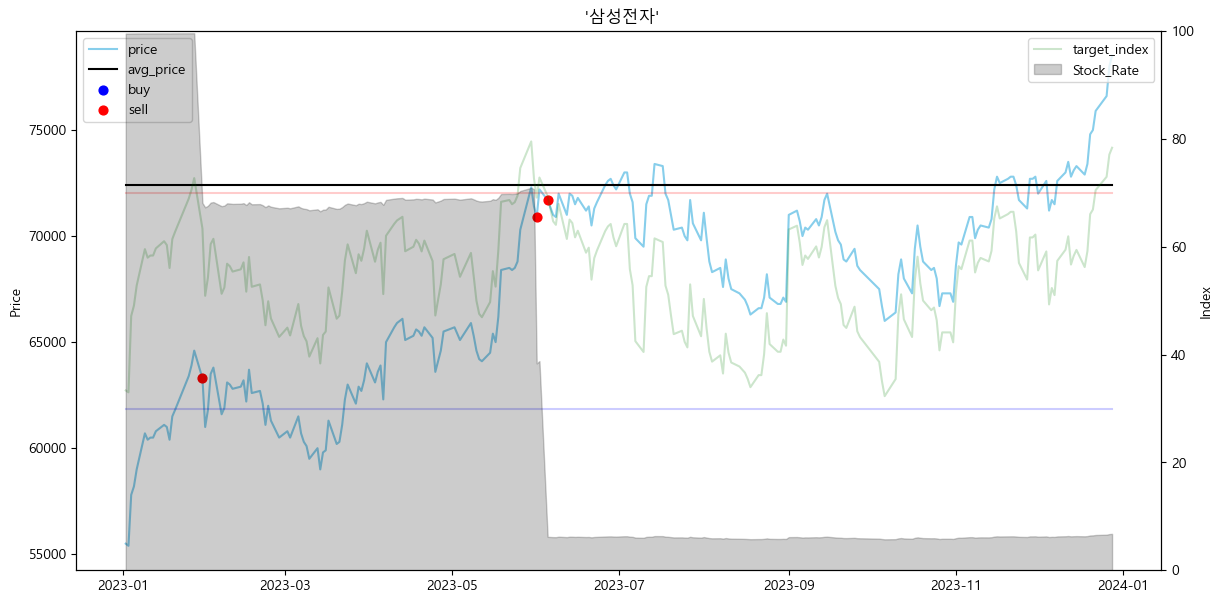

In [34]:
#for i in range(2013,2023):
for i in range(2023,2024):  #2년치만
    log_plot(log1,str(i),str(i+1))

코드 상에는 22년까지 그릴 수 있지만, 2013, 2014년만 나타내었다. 그래프가 확대되어 좀 더 상세하게 가격과 RSI, 투자 현황들을 확인할 수 있다.   
   
매수를 했을 때 회색 bar 그래프가 생기면서 현재 자산 대비 얼마큼 투자되었는지 나타난다. 이후 추가 매수를 하면 회색 bar그래프는 높아지고 검은색 평단가가 조정되는 것을 볼 수 있다. 빨간색 점으로 매도가 이루어지면, 보유 비중이 작아지지만, 평단가는 그대로 있는 것을 볼 수 있다.   
또한, RSI 기준으로 매수, 매도 지점을 확인할 수 있으므로, 매매 전략이 잘 먹히는지 판단할 수 있다.   
   
다음은 손익률 그래프이다.

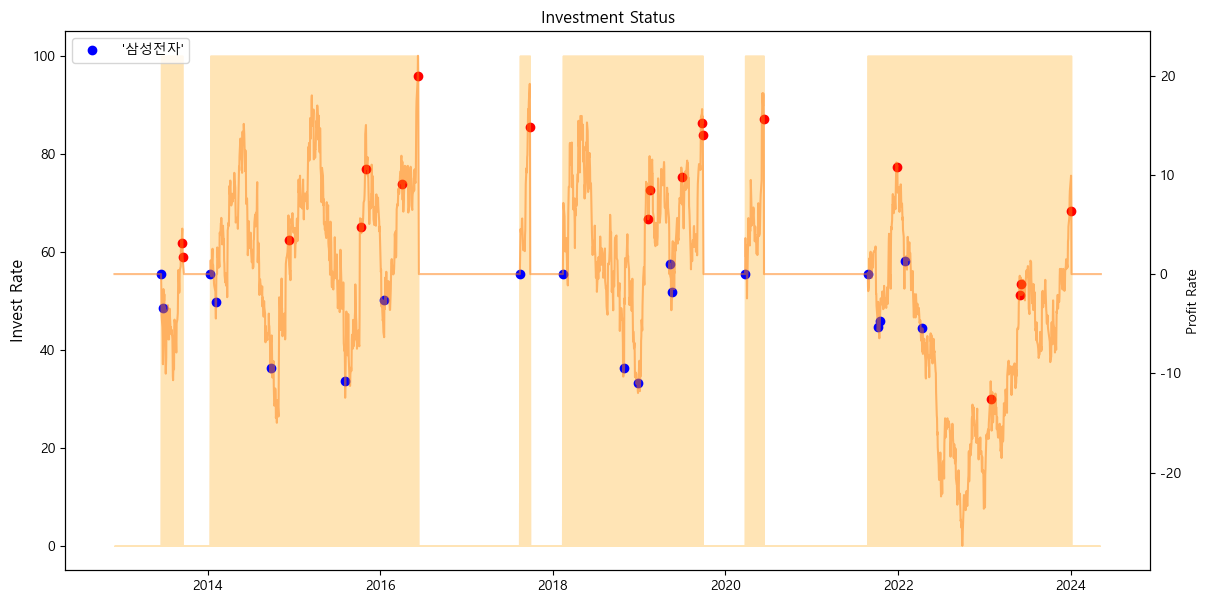

In [35]:
def profit_rate_plot(file_path,color_list,color_list2):
    invest_rate_df = None
    fig, ax1 = plt.subplots(figsize = (14,7)) 
    ax1.set_ylabel("Rate",size =12)
    ax2 = ax1.twinx() 
    stock_name = []
    
    log1 = read_log(file_path+"_log")
    df = pd.DataFrame(np.round(log1["price"] *log1["current_stock"]))
    invest_rate_df = pd.concat([invest_rate_df,df],axis =1)
    stock_name.append(log1.tail(1)["name"].values[0])

    log1 = read_log(file_path+"_log")
    log_p = log1[log1["buy"]==1]
    ax2.scatter(log_p.index,log_p["yield"],color = "blue", zorder=5)
    log_p = log1[log1["sell"]==1]
    ax2.scatter(log_p.index,log_p["yield"],color = "red", zorder=5)

    ax2.plot(log1["yield"],color = color_list2,alpha = 0.5, zorder=5)
        
    ax2.legend(stock_name,loc = "upper left")
    ax2.set_ylabel('Profit Rate') 
    
    invest_rate_df.columns = stock_name
    invest_rate_df["sum"] = invest_rate_df.sum(axis = 1)
    
    
    invest_rate_df.iloc[:,0] = np.round(invest_rate_df.iloc[:,0]/invest_rate_df["sum"]*100,2)
    invest_rate_df = invest_rate_df[:-2]
    invest_rate_df.fillna(0, inplace = True)
    invest_rate_df["sum2"] = invest_rate_df.iloc[:,:-1].sum(axis = 1)
    
    ax1.set_ylabel('Invest Rate') 
    ax1.fill_between(invest_rate_df.index, invest_rate_df["sum2"],color = "moccasin", zorder=1)
    
    invest_rate_df["tmp"] = 0
    invest_rate_df["tmp"] = invest_rate_df["tmp"] + invest_rate_df.iloc[:,0]
    if max(invest_rate_df.iloc[:,0])>0:
        ax1.fill_between(invest_rate_df.index, invest_rate_df["tmp"],color = color_list, zorder=10)
    else:
        ax1.plot()

    plt.title("Investment Status")
    plt.show()
   
color_list = "moccasin"
color_list2 = "tab:orange"
profit_rate_plot(file_path,color_list,color_list2)

왼쪽 축은 투자 비중, 오른쪽 축은 손익률을 나타낸다.   
지금 단일 종목으로 벡테스팅을 하고있기 때문에 현금을 제외하면 모든 투자금이 삼성전자에 해당된다. 따라서 소량만 보유해도 100%로 나타난다. 이는 여러 종목 투자 벡테스팅을 했을 때 다른 그래프가 나타나기에 이후에 소개하겠다.   
역시 파란색 점은 매수, 빨간색 점은 매도를 나타낸다. 만약 보유 주식 수가 0일 때 매수를 진행하면 그때의 손익률은 0%이다. 이후 주가에 따라 주황선 선이 변동되다가 매도를 하면 몇 % 의 수익률을 내고 했는지 알 수 있다. 반대로 추가 매수의 경우 몇 %의 손익률을 기록할 때 매수했는지 나타낸다. 즉, 물타기 혹은 불타기를 하고 있는지 볼 수 있다. 또한, 적절한 수익률을 잘 내면서 매도를 하고 있는지도 나타난다.   
   
정리하자면,   
- 왼쪽 축
    - 투자 비중(0~100%)
   
- 오른쪽 축
    - 손익률
    - 매수, 매도 포인트
   
마지막 그래프는 총자산과 관련된 그래프이다.

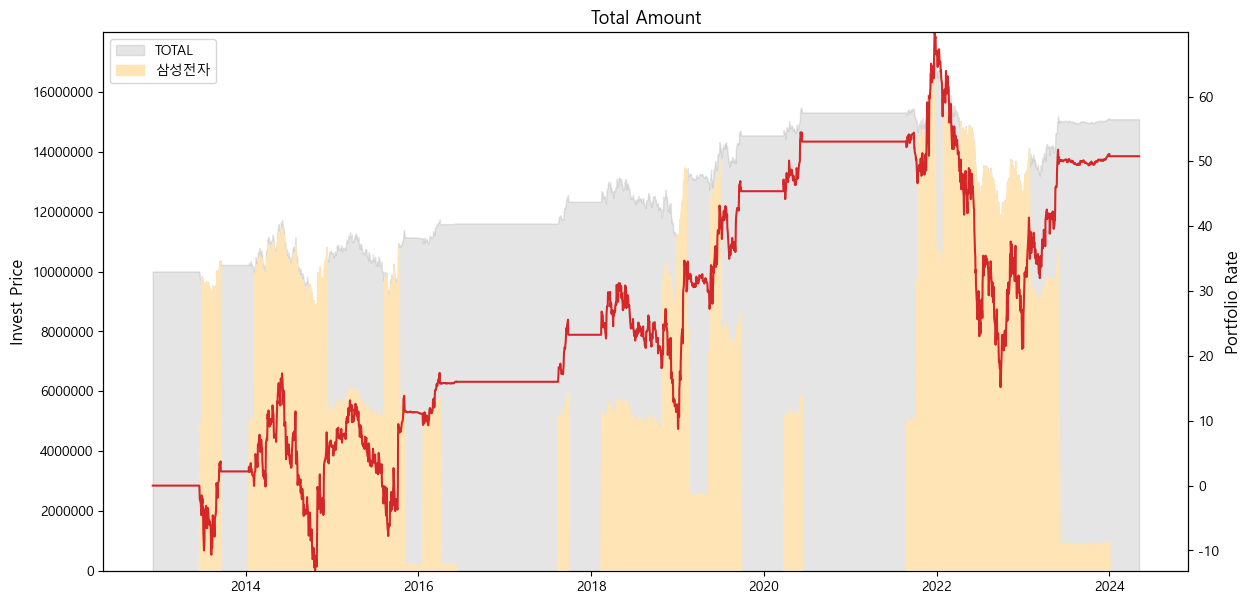

In [36]:
def total_price_df(file_path,target_stock,seed_money):
    log_total = pd.read_csv(file_path+"_total_price_log.txt",sep =",",encoding='cp949')
    log_total = log_total.iloc[:,1:-1]
    log_column = ["time","current_money"]
    
    log_column.append(target_stock)
    log_column.append(target_stock+"_price")
    log_total.columns = log_column
    
    for i,ii in enumerate(log_total.time):  
        log_total.loc[i,"time"] = datetime.datetime.utcfromtimestamp(ii)
    log_total.set_index(log_total.time,inplace= True)
    
    log_total["current_money"] = np.round(log_total["current_money"])
    log_total["total_money"] = log_total["current_money"]
    log_total[target_stock+"_money"] = np.round(log_total[target_stock]*log_total[target_stock+"_price"])
    log_total["total_money"] = log_total["total_money"] + log_total[target_stock+"_money"]

    log_total["profit_rate"] = np.round(log_total["total_money"]/seed_money*100-100,2)
    return log_total
    
def total_plot(log_total_all,stock_list,color_list,seg = False,start_day = None, last_day = None):
    log_total = log_total_all.copy()
    if start_day is not None:
        log_total = log_total[log_total.index>=start_day]
    if last_day is not None:
        log_total = log_total[log_total.index<=last_day]
        
    fig, ax1 = plt.subplots(figsize = (14,7)) 
    ax1.set_ylabel("Invest Price",size =12)
    ax2 = ax1.twinx() 
    ax1.set_ylim(0,max(log_total["total_money"])+1000000)
    ax1.ticklabel_format(axis='y',useOffset=False, style='plain')
    ax1.fill_between(log_total.index, log_total["total_money"],color = "tab:gray",alpha = 0.2)
    if seg == True:
        log_total["tmp"] = 0
        log_total["tmp"] = log_total["tmp"] + log_total[target_stock+"_money"]
        if max(log_total[target_stock+"_money"])>0:
            ax1.fill_between(log_total.index, log_total["tmp"],color = color_list, zorder=10)
        else:
            ax1.plot()
        ax1.legend(["TOTAL"]+[target_stock],loc = "upper left")
        
    else:
        ax1.legend(["TOTAL"],loc = "upper left")
    ax2.plot(log_total["profit_rate"],color = "tab:red")
    ax2.set_ylabel("Portfolio Rate",size = 12)
    
    ax2.set_ylim(min(log_total["profit_rate"])-0.1,max(log_total["profit_rate"])+0.1)
    plt.title("Total Amount",size = 13)
    plt.show()

log_total = total_price_df(file_path,target_stock,seed_money)
total_plot(log_total,target_stock,color_list,True)

총 자산과 투자 비중을 나타낸 그래프이다.   
왼쪽 축은 금액, 오른쪽 축은 손익률을 나타낸다. 회색 bar그래프는 총 자산, 주황색 bar그래프는 삼성전자 투자 금액이다. 빨간색 선은 초기 투자자산 대비 총자산을 나타낸 것으로 1,000만원 기준의 손익률을 나타낸다.   
1,000만원으로 시작한 벡테스팅에서 첫 매수를 한 후 손익률과 총자산이 줄어드는 것을 볼 수 있다. 이후 수익이 났을 때 매도한 후 다시 매수, 매도를 반복하며 총자산을 불려 가는 것을 볼 수 있다.   
여러 종목을 매매한다면, 총 자산 대비 투자 현황을 볼 수 있는 그래프가 될 것이다.   
   
결국 자동 매매 프로그램을 만드는 것은 수익을 잘, 안정적으로 낼 수 있도록 하는 것이기 때문에 위의 그래프에서 볼 수 있도록 했다.   
   
여기까지 시각화 자료에 대해 설명했다.   
코드가 조금 복잡하기 때문에 천천히 이해하면서 구현하는 것이 필요할 듯싶다.   
시각화 자료는 이정도로 정리하고 여러 종목을 동시에 모니터링하고 매매할 수 있도록 수정한 다음 본격적으로 전략을 짜서 최적화된 매매를 할 수 있도록 계속해보겠다.

# 5. 투자지표를 활용한 매매 시점 모니터링 - KOSPI 종목 백테스팅

현재 적용되어 있는 전략은 RSI를 이용한 매매로 30, 70 기준값 사용한다.   
기본 전략을 다시 한번 소개하면,   
   
- 30 이하일 때 매수 대기, 30 이상으로 올라가면 매수
- 70 이상일 때 매도 대기, 70 이하로 떨어지면 매도
   
이렇게 간단한 전략이 적용되어 있다. RSI를 말할 때 보편적으로 소개되는 전략이긴 한데, 과연 이 전략이 어떤 종목에 적용해도 효과가 있을까?   
자동 매매를 위한 전략이라 함은 어떤 종목을 가져와도 수익이 날 가능성이 있는, 즉 수익이 날 확률을 높이기 위해 만들어지는 것이라 생각한다. 따라서 시장에 상장되어있는 모든 종목에 적용해 보고 수익이 나는 종목이 더 많도록 전략을 검증하고자 한다.   
   
검증 과정은 동일한 조건으로 코스피에 상장되어있는 모든 종목에 적용했을 때 현재 기준으로 손익률을 평가한다.   
현재 조회되는 코스피 종목은 총 824개가 있으며, 시드머니는 1,000만원으로 시작했다. 그리고 1회 매매 기준 금액은 500만원으로 설정했다. 즉 매매 시그널이 발생하면 500만원씩 매수 혹은 매도하는 것이다.   
투자 시점은 2013년부터 하되, 그 이후 상장된 종목은 상장 시점부터 RSI값이 생성되는 14일 이후부터 벡테스팅을 시작한다.   
벡테스팅을 완료하고 연평균 수익률을 계산해 전략에 대한 수익성 검증을 한다.   
   
정리하자면,   
- 시드 머니 1,000만원
- 1회 매매 기준 금액 500만원
- 투자 지표 RSI
- 투자 시점 2013년 ~ 2022년(2013년 이후 상장 종목은 상장 시점부터)
- 손절선 없이 벡테스팅
   
2022.11.07 - [개발일지] - 3. 투자지표를 활용한 매매 시점 모니터링 - 벡테스팅   
이 글에서 이어서 실행시키면 오류 없이 실행될 것이다. 필요한 함수와 패키지가 윗글에 정리되어있다.   
   
이어서 Kospi 종목을 벡테스팅 하는 코드는 아래와 같다.

In [ ]:
%%time
kospi_symbol_list = []
kospi_current_price = []
kospi_time_index = []
lower_cut = 30
upper_cut = 70
stop_loss = -100
seed_money = 10000000
set_base_buy = 5000000
for kospi_symbol in kospi_data.Code:
    ks = kospi_data[kospi_data["Code"]==kospi_symbol]
    target_stock = ks.Name.values[0]
    
    print(target_stock)
    #price_data = fdr.DataReader(ks.Symbol.values[0],"2012-12-1")
    price_data = fdr.DataReader(ks.Code.values[0],"2022-5-6")
    if price_data.shape[0]>100:
        price_data["stock_name"]=target_stock
        RSI_df = rsi(price_data, "Close",14)
        RMI_df = rmi(price_data, "Close",14)
        price_data["RSI"] = RSI_df
        price_data["RMI"] = RMI_df
        price_data = price_data[20:]
    
        bitrade = set_init(target_stock,save_path,seed_money,set_base_buy)
        plot_value = trading_simulation(bitrade,price_data,"RSI",lower_cut,upper_cut,stop_loss)
        
    kospi_symbol_list.append(ks.Code.values[0])
    kospi_current_price.append(plot_value[-1])
    kospi_time_index.append(price_data.head(1).index)
print("DONE")

종목코드, 마지막 가격, 매매 시작 일자를 기록하는 리스트를 만들어 벡테스팅을 진행한다.   
총 실행 시간은 1시간 13분 소요.   
   
방법은 이전 글에서 실행했던 것과 동일하다. 개별 종목을 벡테스팅하면서 마지막 날짜에 평가된 자산을 기록한다.   
주식을 보유하고 있으면 일 별 현재 가격에 따라 계속 총자산이 변할 것이고, 전량 매도한 상태이면 총자산이 변동이 없을 것이다.

In [ ]:
kospi_result = pd.concat([pd.DataFrame(kospi_symbol_list),pd.DataFrame(kospi_current_price),
                          pd.DataFrame(kospi_time_index)],axis = 1)
kospi_result.columns = ["Symbol","Last_money","time"]

기록된 리스트를 데이터 프레임 형식으로 만들어 주고 컬럼명을 부여한다.

In [ ]:
kospi_result = pd.merge(kospi_result,kospi_data[["Symbol","Name"]])
kospi_result.set_index("time",inplace = True)

종목코드로는 어떤 기업인지 알기 어렵기 때문에 종목 이름을 붙여 준 후 time에 해당하는 컬럼은 index로 만들어 조회가 편하게 한다.   
   
이렇게 만들어진 데이터는 아래와 같다.   
총 821개 kospi 종목에 대한 현재 시점의 평가 금액이다. Last_money 부분이 평가 금액 부분이다.

824개를 조회했는데 821개 종목만 데이터로 만들어진 것은 상장한지 얼마 되지 않은(100일 미만) 종목은 제외했기 때문이다.   
time 컬럼은 모니터링을 시작한 시점이다.   
이제 연평균 수익률을 구해 어느 종목이 가장 투자 손익률이 좋았는지 알아보자.   
연평균 수익률은 공식은 다음과 같다.   

<p style="font-size:16px"><b>CAGR = (최종금액 / 최초금액) ^ (1 / 기간) -1</b></p>
   
그런데 한 가지 문제가 있다. 각 종목이 시작 시점이 다르기 때문에 연평균 수익률을 내기 위해선 각기 다른 기간을 적용해야 한다.   
   
따라서 현재 일을 기준으로 투자 시작일과의 차이(day)를 구해 연으로 환산한다.

In [ ]:
kospi_result["current_time"] = price_data.tail(1).index.values[0]
kospi_result["current_time"] = kospi_result["current_time"] - kospi_result.index
kospi_result["current_time2"] = kospi_result["current_time"].astype(str).str.split(" ").str[0].astype(int)
kospi_result["current_time2"] = np.round(kospi_result["current_time2"]/365,2)

current_time2 컬럼이 소수점 단위의 기간 연도가 만들어졌다.   
계산된 기간을 이용해 연평균 수익률을 계산하는 식에 대입해 수익률을 계산한다.

In [ ]:
kospi_result["average_yield"] = np.round((np.power((kospi_result["Last_money"] / seed_money),
                                                   1/kospi_result["current_time2"])-1)*100,2)

위의 과정으로 만들어진 코스피 종목 별 연평균 수익률이다.   
   
이 데이터를 이용해 RSI 기본 전략을 적용했을 때의 코스피 전체 종목 손익률을 보자.

In [ ]:
import seaborn as sns

plt.title("연평균 수익률 분포")
sns.distplot(kospi_result["average_yield"],bins = 15)
plt.show()

최대 30%, 최소 -66프로 손익률이 났다. 히스토그램으로 보면 -20~20 사이에 대부분 분포하고 있는 것을 볼 수 있다.   
그럼 최대, 최소 손익률이 난 종목들을 보자.

In [ ]:
kospi_result[kospi_result["average_yield"]<-20].sort_values(["average_yield"],ascending = True)

손실률이 20%를 넘어가는 종목을 보니 2년 안에 상장된 기업이 대부분이다. 최근 IPO 공모주에 대한 관심이 높아져 초기 수요에 따른 급등 및 급락이 반복되어 이런 현상이 나타나는 것 같다. 따라서 기간이 짧고 연평균 손실률 큼에도 불구하고 잔액은 어느 정도 남아있다.   
반면에 투자기간이 길며 연평균 수익률도 낮은 종목 중 대표적으로 비케이탑스를 보자. 투자기간 9.85년, 연평균 손익률 -34.3%를 기록했다. 원금 1000만원이 약 16만원이 남았다. RSI 기본 전략의 대표적인 실패 케이스이다.

반대로 연평균 손익률이 좋은 종목을 보자.

In [ ]:
kospi_result[kospi_result["average_yield"]>15].sort_values(["average_yield"],ascending = False)

대부분 장기 투자로 인한 높은 손익률을 기록했다. 그중 아남전자의 경우 9.85년 투자기간, 22.68%의 연평균 손익률을 기록해 원금 1,000만원이 약 7,300만원을 기록했다. RSI 기본 전략의 우수한 케이스이다.   
아남전자를 그대로 가지고 2013년에 원금을 넣고 가만히 있었다면 581원에서 22년 11월 8일자 기준 1,920으로 약 3배 정도 불릴 수 있었지만, RSI 지표를 이용해 약 7배를 불릴 수 있었다. 
즉, 투자 전략을 잘 이용하면 더 높은 수익을 기대할 수 있는 것이다.

그럼 이 투자 전략을 사용했을 때 수익을 볼 확률이 더 높을까를 고민해봐야 한다.   
투자 전략을 아무리 잘 만들어도 100% 수익을 낼 수 있는 투자 기법은 존재하지 않는다. 결국 투자 시 수익을 내기 위한 확률을 높이는 것이 전략을 세울 때 가장 중요하게 봐야 할 것이다.   
   
지금 RSI 투자 전략으로 얻을 수 있는 수익을 낼 수 있는 종목 분포를 확인해 보면

In [ ]:
np.round(kospi_result[kospi_result["average_yield"]>0].shape[0] / kospi_result.shape[0] *100,2)
np.round(kospi_result[kospi_result["average_yield"]<0].shape[0] / kospi_result.shape[0] *100,2)

손익률 0% 초과한 종목이 전체 종목의 57.73 %, 손익률 0% 미만인 종목이 42.27%이다.   
이 말은 이 전략으로 접근했을 때 수익을 낼 확률이 57.73%가 된다는 말이다. 절반보다 조금 높다. 개인적인 생각으론 이렇게 해도 전략 없이 접근하는 것보다는 수익이 낼 확률이 높다고 생각한다.(직접 경험한 바에 의하면......)   
   
다음으로 수익을 낼 확률이 높은데 수익률도 높은가와 반대의 경우도 체크해보자. 먼저 그래프로 보면,   
   
   
손익률 +의 0 ~ 20% 분포와 -의 -0 ~ -20%는 구성이 대략 비슷한데, -의 경우 상장폐지와 같은 이유로 -20%보다 더 낮은 구간을 기록했다.   
따라서 전략을 세울 때 마이너스를 기록하는 종목의 투자를 최대한 방지해 손해를 입는 경우를 줄여나가는 방향도 중요할 것이다. 즉, 안정적인 투자도 추구해야 할 것이다.   
   
수익이 난 경우 평균 5.96%, 중위수 5.17%의 연평균 수익률이 나타난다.   
손해가 난 경우 평균 - 7.29%, 중위수 -4.45%의 연평균 손해율이 나타난다.   
   
원금 1000만원으로 모든 종목에 동일하게 투자했을 때 연평균 수익률을 평균과 중위수로 계산한다면,

In [ ]:
# 연평균 수익률 + 중위수
1000*np.power(1.0517,10) - 1000
# 연평균 수익률 - 중위수
1000*np.power(0.9555,10) - 1000

# 연평균 수익률 + 평균
1000*np.power(1.0596,10) - 1000
# 연평균 수익률 - 평균
1000*np.power(0.9271,10) - 1000

순서대로   
- 연평균 수익률 + 중위수 : 655만원
- 연평균 수익률 - 중위수 : -366만원
- 연평균 수익률 + 평균 : 784만원
- 연평균 수익률 - 평균 : -530만원
   
중위수 기준 655 - 366 = 289   
평균 기준 784 - 530 = 254   
   
정리하자면 원금 1,000만원으로 모든 종목에 테스트한 후 연평균 수익률의 중위수와 평균의 손익을 계산했을 때 각각 254만원, 289만원의 수익을 기대할 수 있었다.   
   
RSI 기본 투자 전략으로 약 2013년부터 약 10년 간 벡테스팅 결과를 정리하자면,   
- 손익 확률 + : 57.73%, - : 42.27%
- 최대 손익률 + : 30.1%, - 66.8%
- 손익 + 연평균 수익률 중위수 : 5.17%, 평균 : 5.96%
- 손익 - 연평균 수익률 중위수 : -4.45%, 평균 : -7.29%
- 기대 수익금 중위수 기준 289만원, 평균 기준 254만원
   
앞으로 투자 전략을 만드는 방향으로 위의 기준과 비교해서   
1. 손익 확률 +를 높여 손해 확률을 낮출 수 있도록 구성
2. 최대 손익률을 줄이는 방향 : 안정적으로 투자하기 위해
3. 기대 수익금을 높이는 방향
   
일단 기초적으로 이렇게 세 가지를 보며 전략을 구성하고자 한다.   
   
위의 기준은 내가 투자 전략을 세우기 위해 기준을 최소한의 가이드라인을 만든 것이다. 따라서 저 가이드라인이 투자 전략을 세울 때 잘 맞을지, 의미가 있을지는 아직 모르겠다. 따라서 투자 전략 가이드라인을 조금 더 고민해보고 전략을 구성하면서 추가할 예정이다. 새로운 가이드라인이 만들어지면 관련 내용을 포스팅하도록 하겠다.   
   
전략의 기준은 개인이 중요하다 판다한는 것으로 설정하면 될 것이다. 참고할 수 있는 지표도 개인의 판단으로 더 필요한 값을 만들어 비교할 수 있다.   
투자 전략 또한, 추구하는 방향으로 만들면 될 것이다. 예를 들어 투자 중 최대 손실률을 줄이는 방향으로(안정성이 높은 전략) 만들 수도 있고, 최대 손실률이 높더라도 최대 수익률을 높이는 방향으로(위험성이 있지만, 기대수익이 커지는 전략)으로 만들 수도 있을 것이다.